<a href="https://colab.research.google.com/github/mingjiez912/Machine_Learning_Lab/blob/main/DecisionTree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


# 1.) US perm Visas csv from cycle using zip extractor


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
pd.set_option('display.max_columns', None)
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,fw_info_postal_code,fw_info_rel_occup_exp,fw_info_req_experience,fw_info_training_comp,fw_info_yr_rel_edu_completed,fw_ownership_interest,ji_foreign_worker_live_on_premises,ji_fw_live_on_premises,ji_live_in_dom_svc_contract,ji_live_in_domestic_service,ji_offered_to_sec_j_foreign_worker,ji_offered_to_sec_j_fw,job_info_alt_cmb_ed_oth_yrs,job_info_alt_combo_ed,job_info_alt_combo_ed_exp,job_info_alt_combo_ed_other,job_info_alt_field,job_info_alt_field_name,job_info_alt_occ,job_info_alt_occ_job_title,job_info_alt_occ_num_months,job_info_combo_occupation,job_info_education,job_info_education_other,job_info_experience,job_info_experience_num_months,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_req_normal,job_info_job_title,job_info_major,job_info_training,job_info_training_field,job_info_training_num_months,job_info_work_city,job_info_work_postal_code,job_info_work_state,naics_2007_us_code,naics_2007_us_title,naics_code,naics_title,naics_us_code,naics_us_code_2007,naics_us_title,naics_us_title_2007,orig_case_no,orig_file_date,preparer_info_emp_completed,preparer_info_title,pw_amount_9089,pw_determ_date,pw_expire_date,pw_job_title_908,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_source_name_other_9089,pw_track_num,pw_unit_of_pay_9089,rec_info_barg_rep_notified,recr_info_barg_rep_notified,recr_info_coll_teach_comp_proc,recr_info_coll_univ_teacher,recr_info_employer_rec_payment,recr_info_first_ad_start,recr_info_job_fair_from,recr_info_job_fair_to,recr_info_on_campus_recr_from,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,NEW YORK,NaN,NaN,NETSOFT USA INC.,NaN,NaN,NaN,10010.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,NY,541512,Computer Systems Design Services,

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [5]:
for i in df.columns:
    print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [6]:
df_select = df[['case_status', 'class_of_admission', 'pw_amount_9089', 'pw_unit_of_pay_9089', 'country_of_citizenship', 'foreign_worker_info_education']]
df_select.head()

,case_status,class_of_admission,pw_amount_9089,pw_unit_of_pay_9089,country_of_citizenship,foreign_worker_info_education
0,Certified,J-1,75629.0,yr,NaN,NaN
1,Denied,B-2,37024.0,yr,NaN,NaN
2,Certified,H-1B,47923.0,yr,NaN,NaN
3,Certified,B-2,10.97,hr,NaN,NaN
4,Certified,L-1,94890.0,yr,NaN,NaN


# 3.) Clean your data for a decision tree


In [7]:
df_select.isnull().sum()

case_status                           0
class_of_admission                22845
pw_amount_9089                     2216
pw_unit_of_pay_9089                1572
country_of_citizenship            20633
foreign_worker_info_education    135309
dtype: int64

In [8]:
df_select.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [9]:
df.class_of_admission.unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', nan, 'E-1', 'H-2B',
       'TPS', 'F-1', 'B-1', 'C-1', 'Not in USA', 'TN', 'H-4', 'O-1',
       'R-1', 'L-2', 'Q', 'F-2', 'H-1B1', 'Parolee', 'G-5', 'E-3', 'H-2A',
       'VWT', 'P-1', 'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2',
       'P-4', 'I', 'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3',
       'Parol', 'O-2', 'H1B', 'N', 'T-1', 'TD', 'M-1', 'K-1', 'U-1',
       'AOS', 'P-2', 'C-3', 'V-2', 'M-2'], dtype=object)

In [10]:
df.pw_unit_of_pay_9089.unique()

array(['yr', 'hr', nan, 'bi', 'mth', 'wk', 'Hour', 'Year', 'Bi-Weekly',
       'Week', 'Month'], dtype=object)

In [11]:
# Convert pw_amount_9089 into yearly wages 
df_select.loc[df_select["pw_unit_of_pay_9089"] == "hr", "pw_amount_9089"] = df_select.pw_amount_9089 * 2080 
df_select.loc[df_select["pw_unit_of_pay_9089"] == "Hour", "pw_amount_9089"] = df_select.pw_amount_9089 * 2080 
df_select.loc[df_select["pw_unit_of_pay_9089"] == "bi", "pw_amount_9089"] = df_select.pw_amount_9089 * 26
df_select.loc[df_select["pw_unit_of_pay_9089"] == "Bi-Weekly", "pw_amount_9089"] = df_select.pw_amount_9089 * 26
df_select.loc[df_select["pw_unit_of_pay_9089"] == "wk", "pw_amount_9089"] = df_select.pw_amount_9089 * 52
df_select.loc[df_select["pw_unit_of_pay_9089"] == "Week", "pw_amount_9089"] = df_select.pw_amount_9089 * 52
df_select.loc[df_select["pw_unit_of_pay_9089"] == "mth", "pw_amount_9089"] = df_select.pw_amount_9089 * 12
df_select.loc[df_select["pw_unit_of_pay_9089"] == "Month", "pw_amount_9089"] = df_select.pw_amount_9089 * 12

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [12]:
df_select.foreign_worker_info_education.unique()

array([nan, "Bachelor's", 'None', 'Doctorate', "Master's", 'Other',
       'High School', "Associate's"], dtype=object)

In [14]:
# Convert object into float 
df_select['pw_amount_9089'] = pd.to_numeric(df_select['pw_amount_9089'], errors = 'coerce')
df_select.dtypes

<ipython-input-14-eb324724ef84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['pw_amount_9089'] = pd.to_numeric(df_select['pw_amount_9089'], errors = 'coerce')


case_status                       object
class_of_admission                object
pw_amount_9089                   float64
pw_unit_of_pay_9089               object
country_of_citizenship            object
foreign_worker_info_education     object
dtype: object

In [15]:
# Dealing with NaN values 

df_select['pw_amount_9089'].fillna(df_select['pw_amount_9089'].mean(), inplace = True)
df_select['class_of_admission'].fillna('Unknown', inplace = True)
df_select['country_of_citizenship'].fillna('Unknown', inplace = True)
df_select['foreign_worker_info_education'].fillna('Unknown', inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
df_select = df_select[["class_of_admission", "pw_amount_9089", "country_of_citizenship", "foreign_worker_info_education"]] # Final four features 
df_select.head()

,class_of_admission,pw_amount_9089,country_of_citizenship,foreign_worker_info_education
0,J-1,75629.0,Unknown,Unknown
1,B-2,37024.0,Unknown,Unknown
2,H-1B,47923.0,Unknown,Unknown
3,B-2,22817.6,Unknown,Unknown
4,L-1,94890.0,Unknown,Unknown


In [18]:
X = pd.get_dummies(df_select, prefix = ["class_of_admission", "country_of_citizenship", "foreign_worker_info_education"])
y = df["case_status"]

In [21]:
X.head()

,pw_amount_9089,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,class_of_admission_D-1,class_of_admission_E-1,class_of_admission_E-2,class_of_admission_E-3,class_of_admission_EWI,class_of_admission_F-1,class_of_admission_F-2,class_of_admission_G-1,class_of_admission_G-4,class_of_admission_G-5,class_of_admission_H-1A,class_of_admission_H-1B,class_of_admission_H-1B1,class_of_admission_H-1C,class_of_admission_H-2A,class_of_admission_H-2B,class_of_admission_H-3,class_of_admission_H-4,class_of_admission_H1B,class_of_admission_I,class_of_admission_J-1,class_of_admission_J-2,class_of_admission_K-1,class_of_admission_L-1,class_of_admission_L-2,class_of_admission_M-1,class_of_admission_M-2,class_of_admission_N,class_of_admission_Not in USA,class_of_admission_O-1,class_of_admission_O-2,class_of_admission_O-3,class_of_admission_P-1,class_of_admission_P-2,class_of_admission_P-3,class_of_admission_P-4,class_of_admission_Parol,class_of_admission_Parolee,class_of_admission_Q,class_of_admission_R-1,class_of_admission_R-2,class_of_admission_T-1,class_of_admission_TD,class_of_admission_TN,class_of_admission_TPS,class_of_admission_U-1,class_of_admission_Unknown,class_of_admission_V-2,class_of_admission_VWB,class_of_admission_VWT,country_of_citizenship_AFGHANISTAN,country_of_citizenship_ALBANIA,country_of_citizenship_ALGERIA,country_of_citizenship_ANDORRA,country_of_citizenship_ANGOLA,country_of_citizenship_ANTIGUA AND BARBUDA,country_of_citizenship_ARGENTINA,country_of_citizenship_ARMENIA,country_of_citizenship_ARUBA,country_of_citizenship_AUSTRALIA,country_of_citizenship_AUSTRIA,country_of_citizenship_AZERBAIJAN,country_of_citizenship_BAHAMAS,country_of_citizenship_BAHRAIN,country_of_citizenship_BANGLADESH,country_of_citizenship_BARBADOS,country_of_citizenship_BELARUS,country_of_citizenship_BELGIUM,country_of_citizenship_BELIZE,country_of_citizenship_BENIN,country_of_citizenship_BERMUDA,country_of_citizenship_BHUTAN,country_of_citizenship_BOLIVIA,country_of_citizenship_BOSNIA AND HERZEGOVINA,country_of_citizenship_BOTSWANA,country_of_citizenship_BRAZIL,country_of_citizenship_BRITISH VIRGIN ISLANDS,country_of_citizenship_BRUNEI,country_of_citizenship_BULGARIA,country_of_citizenship_BURKINA FASO,country_of_citizenship_BURMA (MYANMAR),country_of_citizenship_BURUNDI,country_of_citizenship_CAMBODIA,country_of_citizenship_CAMEROON,country_of_citizenship_CANADA,country_of_citizenship_CAPE VERDE,country_of_citizenship_CAYMAN ISLANDS,country_of_citizenship_CENTRAL AFRICAN REPUBLIC,country_of_citizenship_CHAD,country_of_citizenship_CHILE,country_of_citizenship_CHINA,country_of_citizenship_COLOMBIA,country_of_citizenship_COMOROS,country_of_citizenship_COSTA RICA,country_of_citizenship_COTE d'IVOIRE,country_of_citizenship_CROATIA,country_of_citizenship_CUBA,country_of_citizenship_CYPRUS,country_of_citizenship_CZECH REPUBLIC,country_of_citizenship_DEMOCRATIC REPUBLIC OF CONGO,country_of_citizenship_DENMARK,country_of_citizenship_DOMINICA,country_of_citizenship_DOMINICAN REPUBLIC,country_of_citizenship_ECUADOR,country_of_citizenship_EGYPT,country_of_citizenship_EL SALVADOR,country_of_citizenship_EQUATORIAL GUINEA,country_of_citizenship_ERITREA,country_of_citizenship_ESTONIA,country_of_citizenship_ETHIOPIA,country_of_citizenship_FIJI,country_of_citizenship_FINLAND,country_of_citizenship_FRANCE,country_of_citizenship_GABON,country_of_citizenship_GAMBIA,country_of_citizenship_GEORGIA,country_of_citizenship_GERMANY,country_of_citizenship_GHANA,country_of_citizenship_GREECE,country_of_citizenship_GRENADA,country_of_citizenship_GUATEMALA,country_of_citizenship_GUINEA,country_of_citizenship_GUINEA-BISSAU,country_of_citizenship_GUYANA,country_of_citizenship_HAITI,country_of_citizenship_HONDURAS,country_of_citizenship_HONG KONG,country_of_citizenship_HUNGARY,country_of_citizenship_ICELAND,country_of_citizenship_INDIA,country_o

# 4.) Fit and plot a decision tree of depth 3


In [22]:
from sklearn import tree

In [23]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

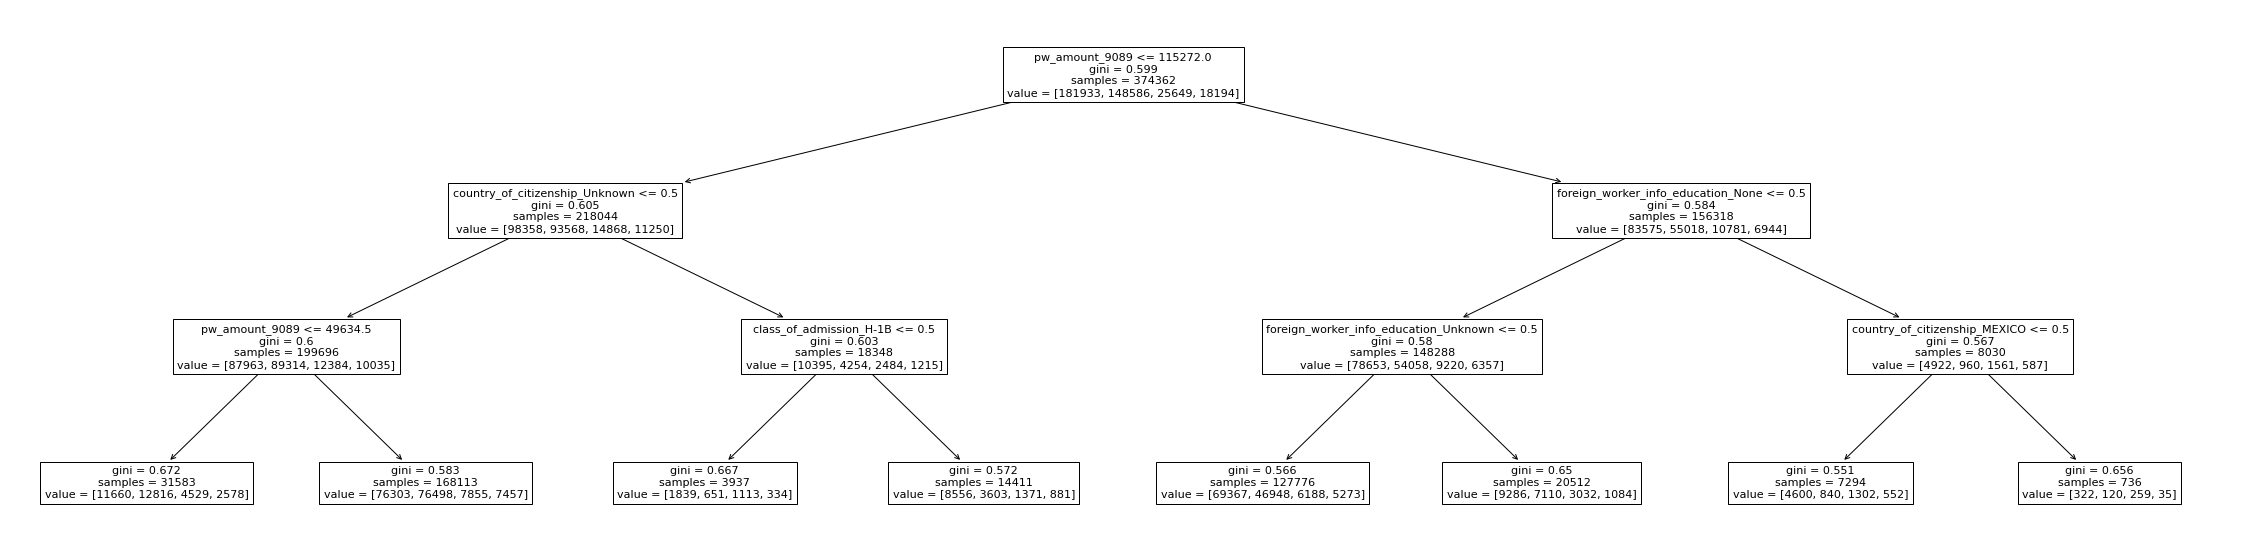

In [31]:
plt.figure(figsize = (40,10))
tree.plot_tree(clf,feature_names = X.columns)
plt.show()

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node gives us the classify criterion is whether or not yearly wages of applicants are less or equal to 115272 dollars. If yes, go to the left branch. If no, go to the right branch. 

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
max_depths = [1,2,3]
outputs = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  oos_accuracy =  (y_pred == y_test).mean()
  outputs.append(oos_accuracy)

In [36]:
outputs

[0.48624776286851457, 0.48987169327480434, 0.4940832880713033]

Max-depth = 3 has the best out-of-sample accuracy.